In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-dataset/IndianFoodDatasetCSV.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/indian-food-dataset/IndianFoodDatasetCSV.csv')

In [4]:
df.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    6871 non-null   int64 
 1   RecipeName              6871 non-null   object
 2   TranslatedRecipeName    6871 non-null   object
 3   Ingredients             6865 non-null   object
 4   TranslatedIngredients   6865 non-null   object
 5   PrepTimeInMins          6871 non-null   int64 
 6   CookTimeInMins          6871 non-null   int64 
 7   TotalTimeInMins         6871 non-null   int64 
 8   Servings                6871 non-null   int64 
 9   Cuisine                 6871 non-null   object
 10  Course                  6871 non-null   object
 11  Diet                    6871 non-null   object
 12  Instructions            6871 non-null   object
 13  TranslatedInstructions  6871 non-null   object
 14  URL                     6871 non-null   object
dtypes: i

In [6]:
df.size

103065

In [7]:
df.isnull().sum()

Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64

In [8]:
df['Ingredients'] = df['Ingredients'].fillna('NA')
df['TranslatedIngredients'] = df['TranslatedIngredients'].fillna('NA')

In [9]:
df = df.drop_duplicates()

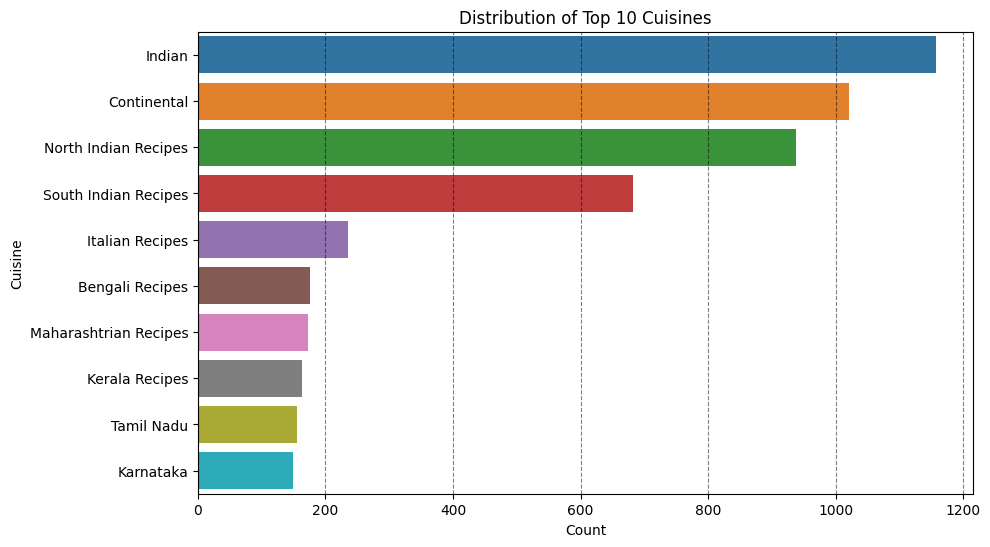

In [10]:
# Distribution of cuisines, focusing on the top 10 cuisines
top_cuisines = df['Cuisine'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(y='Cuisine', data=df[df['Cuisine'].isin(top_cuisines)],order=top_cuisines)
plt.title('Distribution of Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.grid(axis='x', linestyle='--', alpha=0.5,color='black')
plt.show()

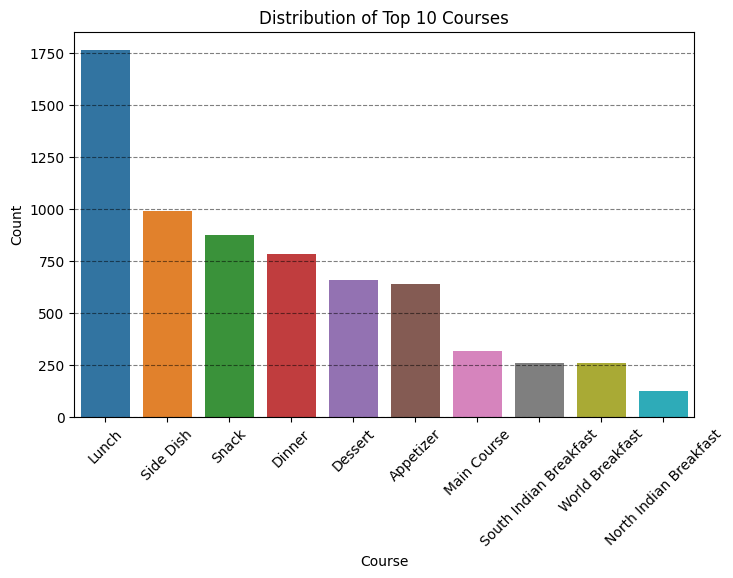

In [11]:
# Distribution of courses, focusing on the top 10 courses
top_courses = df['Course'].value_counts().nlargest(10).index
plt.figure(figsize=(8, 5))
sns.countplot(x='Course', data=df[df['Course'].isin(top_courses)],order=top_courses)
plt.title('Distribution of Top 10 Courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5,color='black')
plt.show()

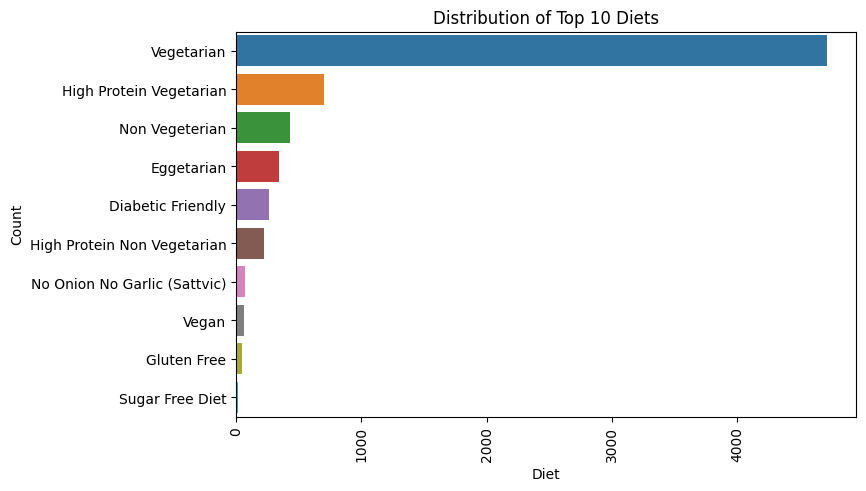

In [12]:
# Distribution of diets, focusing on the top 10 diets
top_diets = df['Diet'].value_counts().nlargest(10).index
plt.figure(figsize=(8, 5))
sns.countplot(y='Diet', data=df[df['Diet'].isin(top_diets)],order=top_diets)
plt.title('Distribution of Top 10 Diets')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

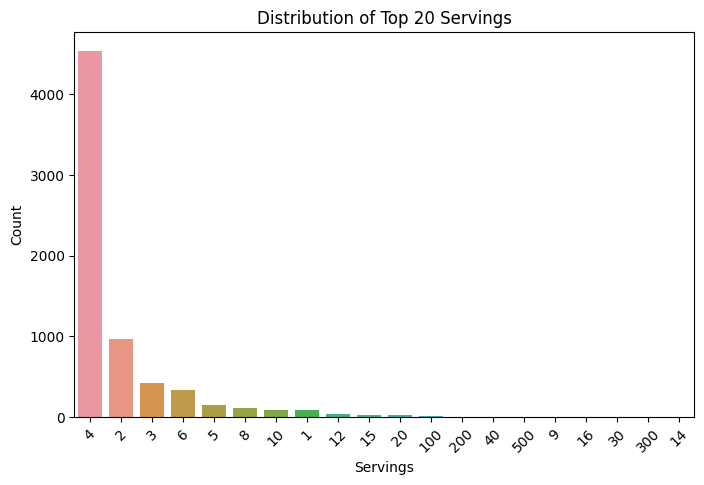

In [13]:
# Distribution of servings, focusing on the top 20 servings
plt.figure(figsize=(8, 5))
top_servings = df['Servings'].value_counts().nlargest(20)
sns.barplot(x=top_servings.index, y=top_servings.values,order=top_servings.index)
plt.title('Distribution of Top 20 Servings')
plt.xlabel('Servings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

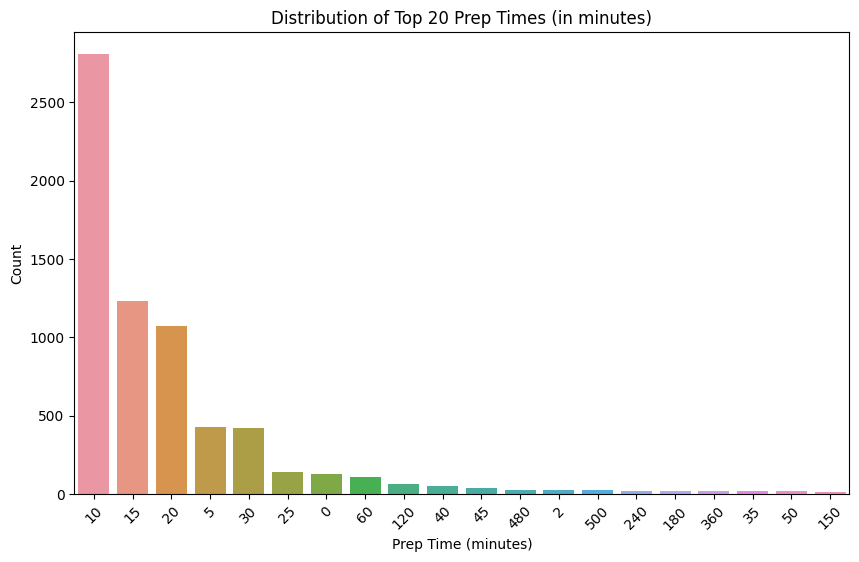

In [14]:
# Distribution of prep time, focusing on the top 20 prep times
plt.figure(figsize=(10, 6))
top_prep_times = df['PrepTimeInMins'].value_counts().nlargest(20)
sns.barplot(x=top_prep_times.index, y=top_prep_times.values,order=top_prep_times.index)
plt.title('Distribution of Top 20 Prep Times (in minutes)')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

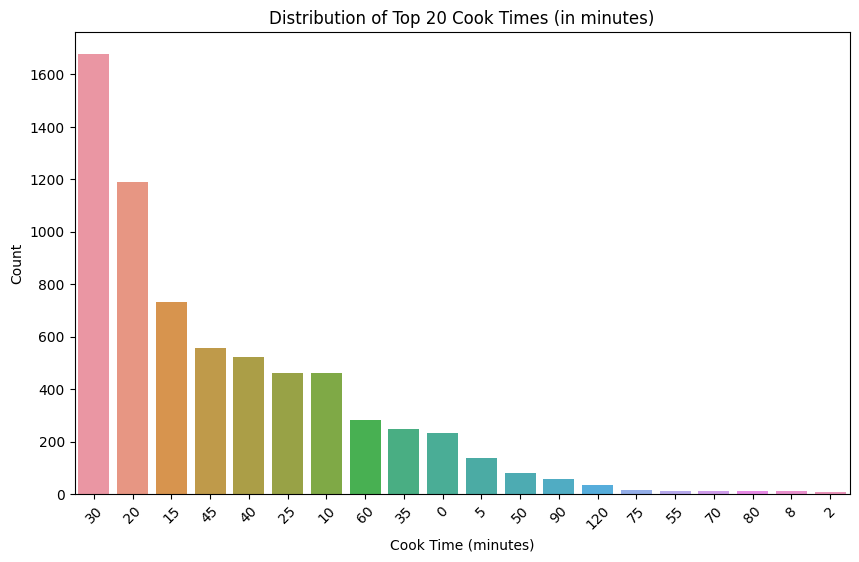

In [15]:
# Similarly, for cook time, focusing on the top 20 cook times
plt.figure(figsize=(10, 6))
top_cook_times = df['CookTimeInMins'].value_counts().nlargest(20)
sns.barplot(x=top_cook_times.index, y=top_cook_times.values,order=top_cook_times.index)
plt.title('Distribution of Top 20 Cook Times (in minutes)')
plt.xlabel('Cook Time (minutes)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()